# Performance Student 

    - Applied Machine Learning for predict performance student 

### Import depedencies

In [53]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from functools import partial, reduce
from statistics import mode, mean, stdev
from operator import itemgetter, eq, sub

### Read dataset with pandas

In [2]:
with open("StudentsPerformance.csv", "r") as csv: 
    df = pd.read_csv(csv)

In [3]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### Add column 'mean score'

In [5]:
df['mean score'] = np.mean(np.array(df[["math score", "reading score", "writing score"]]), axis=1, dtype=np.int64)

In [6]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,bachelor's degree,standard,none,72,72,74,72
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,some college,standard,none,76,78,75,76
5,female,group B,associate's degree,standard,none,71,83,78,77
6,female,group B,some college,standard,completed,88,95,92,91
7,male,group B,some college,free/reduced,none,40,43,39,40
8,male,group D,high school,free/reduced,completed,64,64,67,65
9,female,group B,high school,free/reduced,none,38,60,50,49


### Pre-processing data
    - Change values to quantitative values

In [7]:
def to_categorical(df, value):
    categories = list(pd.Categorical(df).categories)
    return categories.index(value) + 1

In [8]:
columns = ["lunch", "race/ethnicity", "gender", "parental level of education", "test preparation course"]
for name in columns:
    df[name] = df[name].apply(partial(to_categorical, df[name]))

In [9]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,1,2,2,2,2,72,72,74,72
1,1,3,5,2,1,69,90,88,82
2,1,2,4,2,2,90,95,93,92
3,2,1,1,1,2,47,57,44,49
4,2,3,5,2,2,76,78,75,76
5,1,2,1,2,2,71,83,78,77
6,1,2,5,2,1,88,95,92,91
7,2,2,5,1,2,40,43,39,40
8,2,4,3,1,1,64,64,67,65
9,1,2,3,1,2,38,60,50,49


### Remove columns 'math score', 'reading score' and 'writing score'

In [10]:
df = df.drop(labels=["math score", "reading score", "writing score"], axis=1)

In [11]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean score
0,1,2,2,2,2,72
1,1,3,5,2,1,82
2,1,2,4,2,2,92
3,2,1,1,1,2,49
4,2,3,5,2,2,76
5,1,2,1,2,2,77
6,1,2,5,2,1,91
7,2,2,5,1,2,40
8,2,4,3,1,1,65
9,1,2,3,1,2,49


# Rescaling

In [12]:
cmap = sns.diverging_palette(260, 10, as_cmap=True) # color to heatmap

In [13]:
df.dtypes

gender                         int64
race/ethnicity                 int64
parental level of education    int64
lunch                          int64
test preparation course        int64
mean score                     int64
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
gender                         1000 non-null int64
race/ethnicity                 1000 non-null int64
parental level of education    1000 non-null int64
lunch                          1000 non-null int64
test preparation course        1000 non-null int64
mean score                     1000 non-null int64
dtypes: int64(6)
memory usage: 47.0 KB


In [15]:
# '''
#     Categories: very low, low, medium, high, very high 
# '''
# df['score class'] = pd.cut(df["mean score"], 3, labels=False)
# df.drop('mean score', axis=1, inplace=True)
# df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,score class
0,1,2,2,2,2,2
1,1,3,5,2,1,2
2,1,2,4,2,2,2
3,2,1,1,1,2,1
4,2,3,5,2,2,2


In [15]:
df.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.482000,3.174000,3.486000,1.645000,1.642000,67.445000
std,0.499926,1.157179,1.829522,0.478753,0.479652,14.263324
min,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,58.000000
50%,1.000000,3.000000,3.000000,2.000000,2.000000,68.000000
75%,2.000000,4.000000,5.000000,2.000000,2.000000,77.000000
max,2.000000,5.000000,6.000000,2.000000,2.000000,100.000000


In [16]:
df_rescaled = df.apply(lambda col: col / col.max())

In [17]:
df_rescaled.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.741000,0.634800,0.581000,0.822500,0.821000,0.674450
std,0.249963,0.231436,0.304920,0.239376,0.239826,0.142633
min,0.500000,0.200000,0.166667,0.500000,0.500000,0.090000
25%,0.500000,0.400000,0.333333,0.500000,0.500000,0.580000
50%,0.500000,0.600000,0.500000,1.000000,1.000000,0.680000
75%,1.000000,0.800000,0.833333,1.000000,1.000000,0.770000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Plot heatmap for check correlation of datas

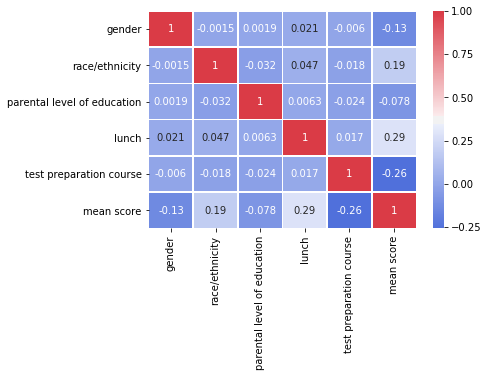

In [18]:
sns.heatmap(df.corr(), cmap=cmap, linewidths=.5, annot=True)

# Splitting Data

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df[['test preparation course', 'race/ethnicity', 'lunch']].values,
    df['mean score'].values, test_size=0.2, random_state=42)

# Defining Algorithm(KNN)

In [79]:
def distance(inst_1, inst_2, dist_type='euclidean'):
    distances = {
        'euclidean': lambda x1, x2: (x1 - x2) ** 2, 
    }
    dist_result = sum(map(distances[dist_type], inst_1, inst_2))
    return dist_result

In [80]:
def get_neighbours(k, distances):
    distances_copy = distances.copy()
    distances_copy.sort()
    return [*map(distances.index, distances_copy[: k])]

In [81]:
def predict(X_train, Y_train, X_test):
    distances = [*map(lambda X_t: [*map(partial(distance, X_t), X_train)], X_test)]
    
    instaces_inds = [*map(partial(get_neighbours, 3), distances)]
    return [*map(lambda inst_inds: mean([*map(lambda ind: Y_train[ind],
                                                 inst_inds
                                             )]),
                 instaces_inds)]

In [82]:
predictions = predict(X_train, Y_train, X_test)

In [83]:
def score(predictions, Y_test):
    return mean([*map(eq, predictions, Y_test)])

In [84]:
def score_regression(predictions, Y_test):
    errors = [*map(lambda x1, x2: abs(x1 - x2), Y_test, predictions)]
    plt.title('Error averange distribution')
    plt.hist(x=errors)
    return mean(errors), stdev(errors) 

(15, 12.884098726725126)

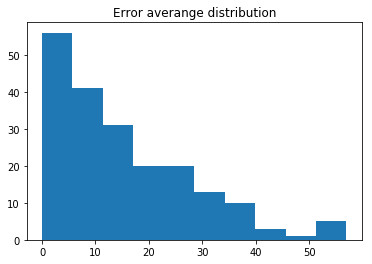

In [85]:
score_regression(predictions, Y_test)